In [1]:
# Modules
import numpy as np
import xarray as xr
import pandas as pd

from data import data_loader
from data import gesla_preprocessing
from data import era5_preprocessing
from data import preprocessing

In [85]:
# ---
# Preprocessing
# ---

# Get timeseries of predictor and predictand
percentile = 0.95
predictor = "v10"
season = "winter"
X, Y, t = preprocessing.preprocessing1(season, predictor, percentile)

Load ERA5-Predictor: v10 in region: lon-0530_lat7040 for years: 1999-2008 in season: winter
Load Predictand from GESLA
Applied one-hot-encoding
Get overlapping timeseries of ERA5 and GESLA


In [80]:
np.where(Y[:, 0] == 1)

(array([ 59,  62,  64,  65,  66,  67,  68,  69,  71,  72,  75,  76,  77,
         81, 121, 124, 128, 130, 131, 132, 133, 295, 296, 298, 299, 300,
        303, 305, 306, 311, 312, 313, 314, 315, 316, 317, 318, 320, 323,
        324, 325, 326, 328, 329, 443, 444, 447, 448, 532, 533, 535, 536,
        540, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557,
        558, 559, 562, 563, 564, 697, 701, 702, 703, 704, 705, 706, 707,
        708, 709, 710, 711, 722, 723, 724, 725, 727, 729, 730, 731, 732,
        733, 734, 735, 736, 737, 738, 739, 740, 741, 742, 743, 744, 745,
        746, 747, 748, 749, 750, 751, 752, 753, 754, 755, 756, 788, 836,
        843, 844, 845, 869, 874], dtype=int64),)

In [102]:
def map(data, lons, lats, tflag="", vmin=None, vmax=None):
    """
    Description:
        Plots predictor-data on a lat-lon map.
    Parameters:
        data (np.array): dataset from predictors. Shape:(lat, lon).flatten()
        lons (np.array): Longitudes of predictor data
        lats (np.array): Latitudes of predictor data
        tflag (str): Additional Title information, (Defaults: "")
        vmin (float): Minimum value for colorbar, (Defaults: None)
        vmax (float): Maximum value for colorbar, (Defaults: None)
    Returns:
        fig: Figure of data
    """
    # Modules
    import matplotlib.pyplot as plt 
    import cartopy.crs as ccrs

    # Reshape data to lat/lon
    nlat = len(lats)
    nlon = len(lons)
    data = data.reshape(nlat, nlon)

    # Adjust colorbar extremes

    # Plot data on lat/lon map
    

    fig = plt.figure(tight_layout=True,)
    ax = plt.axes(projection=ccrs.PlateCarree())
    plot = ax.contourf(lons, lats, data, 
    transform=ccrs.PlateCarree(),
    vmin=vmin,
    vmax=vmax,
    )

    ax.coastlines()
    if vmin == None or vmax == None:
        cbarticks = None
    else:
        cbarticks = np.arange(vmin, vmax, (vmax-vmin)/5)
    plt.colorbar(plot, shrink=.62,ticks=cbarticks)

    ax.set_title(f"Dataset: {tflag}")

    return fig

In [103]:
print(np.max(X))
print(np.min(X))

22.607822
-21.605268


Load ERA5-Predictor: v10 in region: lon-0530_lat7040 for years: 1999-2008 in season: winter


C:\Users\Kai\AppData\Local\Temp\ipykernel_4448\2763525712.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(tight_layout=True,)


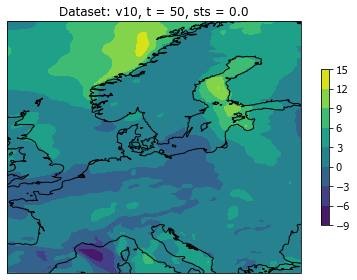

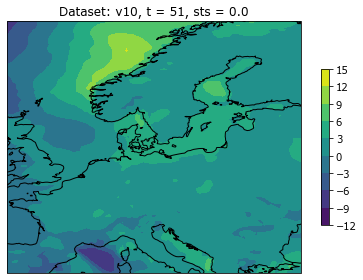

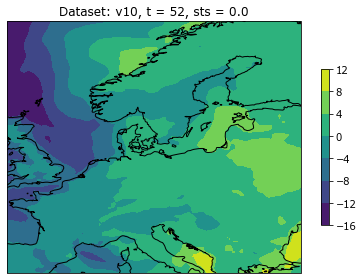

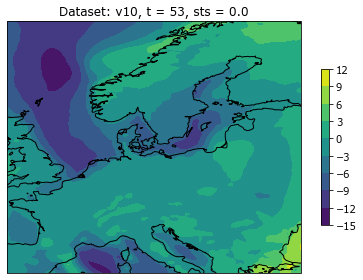

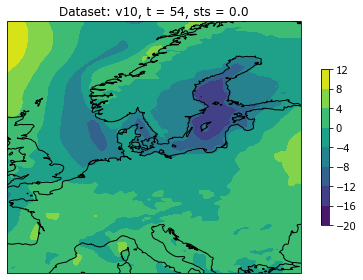

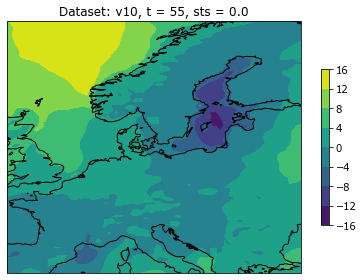

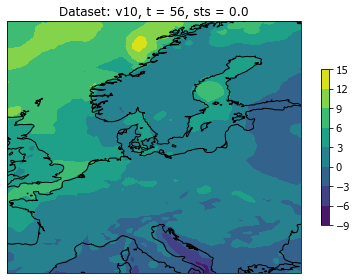

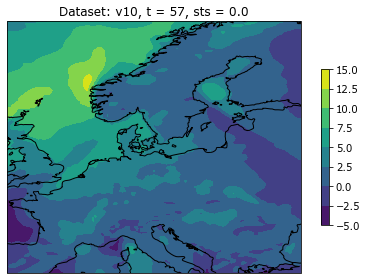

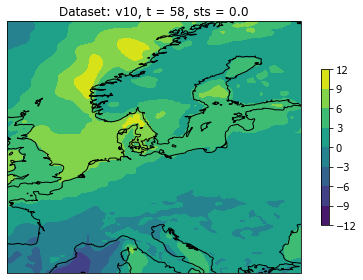

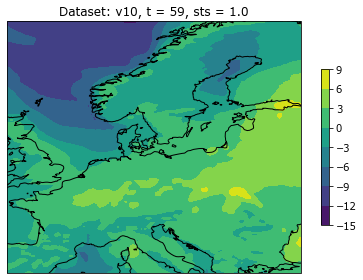

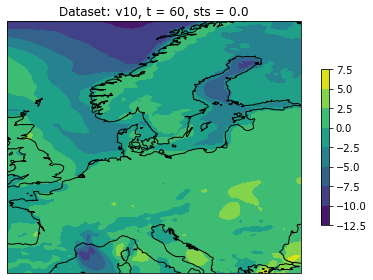

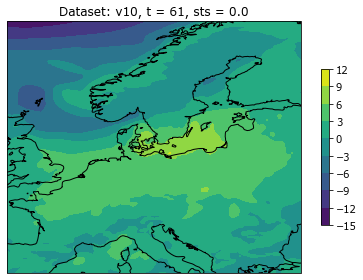

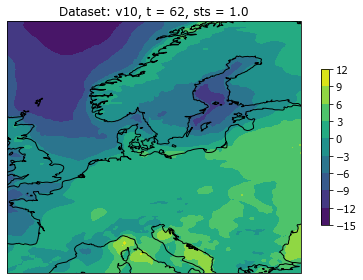

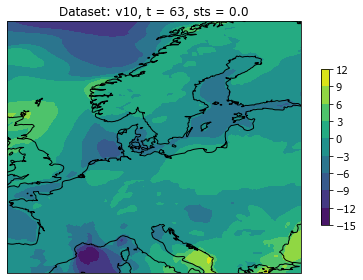

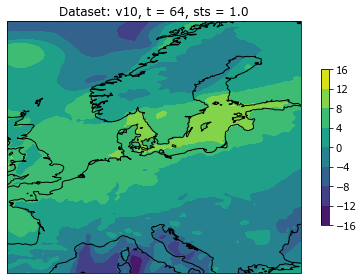

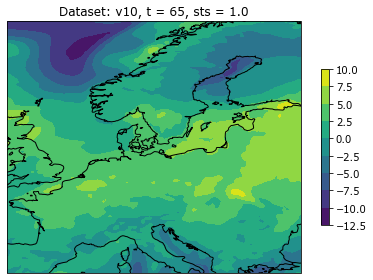

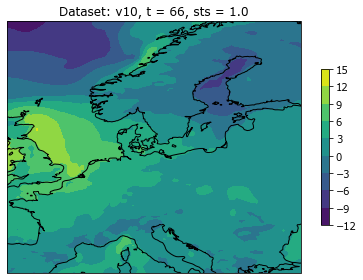

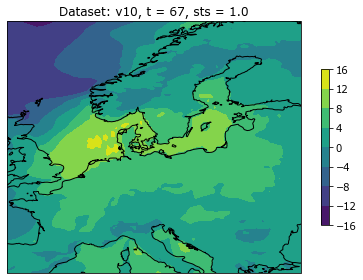

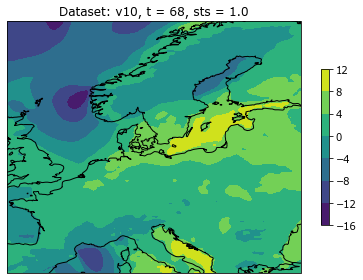

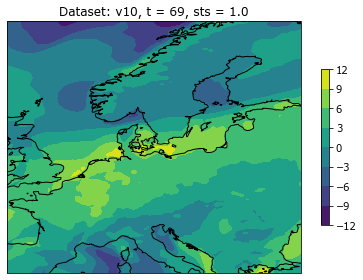

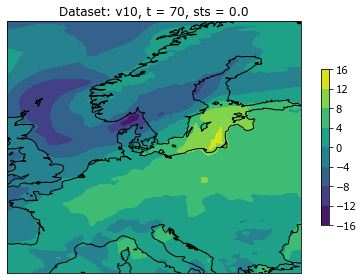

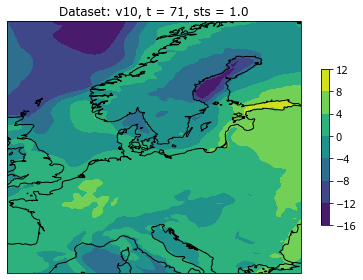

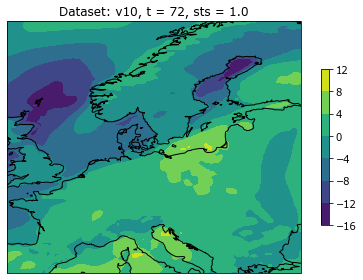

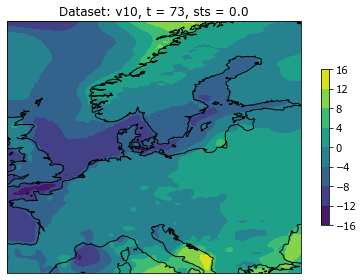

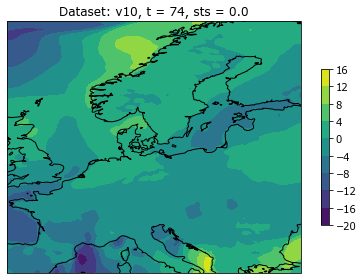

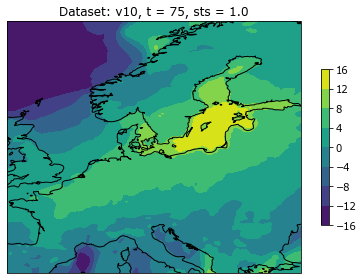

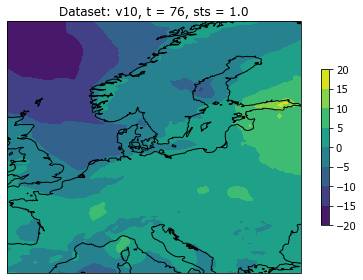

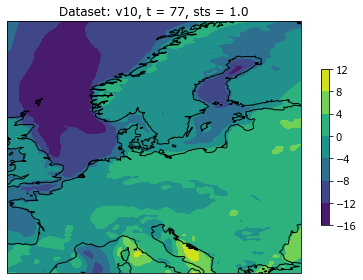

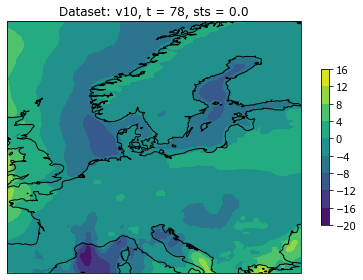

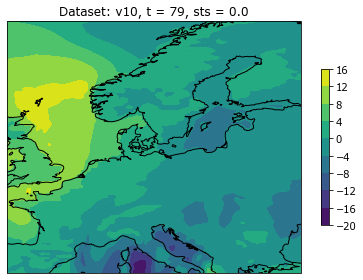

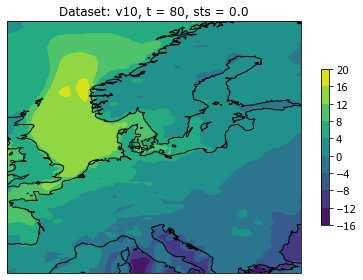

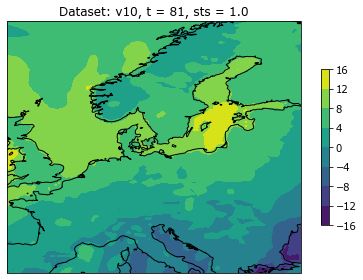

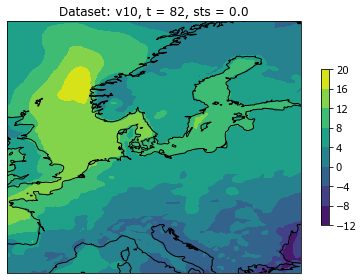

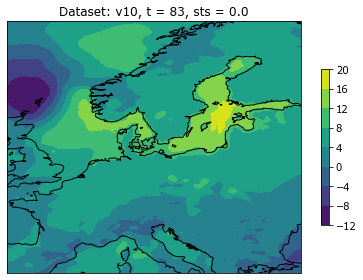

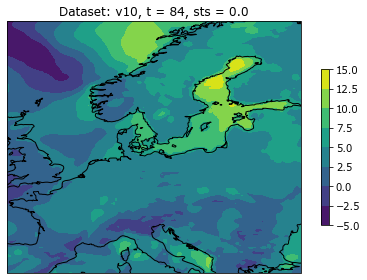

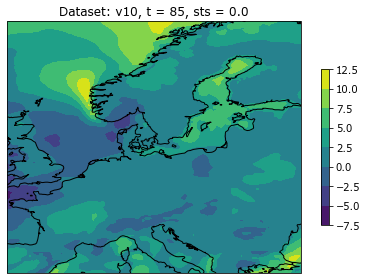

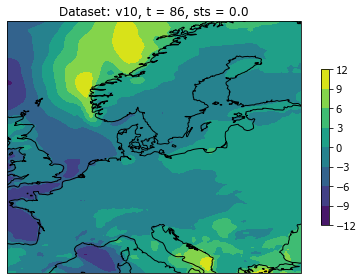

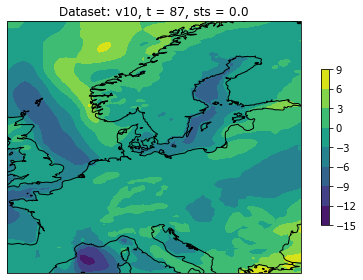

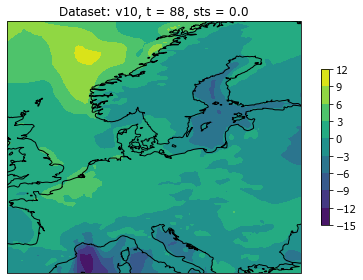

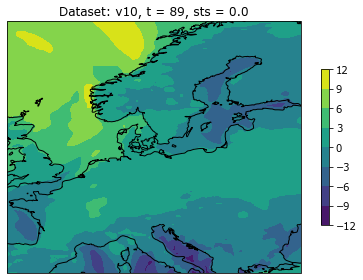

In [104]:
from data import visualisation
import numpy as np

station = 0
range_of_years = "1999-2008"
subregion = "lon-0530_lat7040"
preprocess = "preprocess1"

lats, lons = preprocessing.get_lonlats(
    range_of_years,
    subregion,
    season,
    predictor,
    preprocess,
)

figures = []

for t1 in np.arange(50, 90, 1):
    x = X[t1, :, :].flatten()
    # fig = visualisation.map(x, lons, lats, tflag=f"{predictor}, t = {t1}, sts = {Y[t1, station]}",)
    fig = map(x, lons, lats, tflag=f"{predictor}, t = {t1}, sts = {Y[t1, station]}",)

    # fig.canvas.draw()       # draw the canvas, cache the renderer
    # image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    # image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

    figures.append(fig)


In [98]:
folder = f"./{predictor}"

[<Figure size 432x288 with 2 Axes>, <Figure size 432x288 with 2 Axes>]

In [99]:
def create_gif(figures, path, fps=1):
    """
    Description: 
        Creates and saves a gif from a list of figures
    Parameters:
        figures (list): List of Figures with 2 Axes.
        path (str): Path to save gif to.
        fps (int): Frames per second for gif. (Defaults: 1)
    Returns: 
        None
    """
    import imageio
    images = []
    for fig in figures:
        fig.canvas.draw()       # draw the canvas, cache the renderer
        image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8') # Convert to RGB values
        image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,)) # Reshape for gif

        images.append(image)

    imageio.mimsave(f'{path}.gif', images, fps=fps)

In [ ]:
#---
# Model-runs / Test-runs to create results
#---

# Random Forests
#---
from models.random_forest import rf001
from models.random_forest import rf002

predictors = ["sp", "tp", "u10", "v10",]
percentiles = [0.95, 0.99]

for percentile in percentiles:
    rf001.run(predictor="sp", percentile=percentile) # Only adjusted for SP

for percentile in percentiles:
    for predictor in predictors:
        rf002.run(predictor, percentile)

Load importance of model run: rf002
Get longitudes and latitudes of preprocess: preprocess1
Load ERA5-Predictor: sp in region: lon-0530_lat7040 for years: 1999-2008 in season: winter
Plot importance map
Load importance of model run: rf002
Get longitudes and latitudes of preprocess: preprocess1
Load ERA5-Predictor: sp in region: lon-0530_lat7040 for years: 1999-2008 in season: winter
Plot importance map


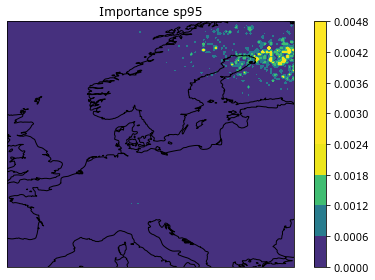

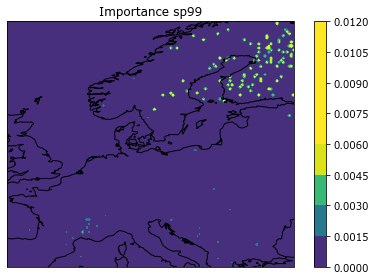

In [ ]:
#---
# Visualization
#---

# Metric: Importance
#---
from data import preprocessing
import numpy as np

# Initialize
model_run = "rf002"
predictors = ["sp", "tp", "u10", "v10",]
percentiles = [0.95, 0.99]
range_of_years = "1999-2008"
subregion = "lon-0530_lat7040"
season = "winter"
preprocess = "preprocess1"

for predictor in predictors[:1]:
    for percentile in percentiles:
        # Load importance of model run
        print(f"Load importance of model run: {model_run}")

        folder = f"results/random_forest/{model_run}/{predictor}/"
        fname = f"importances_{predictor}{str(percentile)[-2:]}"
        importance = np.load(f"{folder}{fname}.npy")

        # Load lat lons
        print(f"Get longitudes and latitudes of preprocess: {preprocess}")
        lats, lons = preprocessing.get_lonlats(
            range_of_years,
            subregion,
            season,
            predictor,
            preprocess,
        )

        # Plot importance-map
        print(f"Plot importance map")
        from models import evaluation
        tflag = f"{predictor}{str(percentile)[-2:]}"
        fig = evaluation.importance_map(importance, lons, lats, tflag=tflag)

        # # Save importance-map
        # folder = f"results/random_forest/rf002/{predictor}/"
        # fname = f"importance_map_{predictor}{str(percentile)[-2:]}"
        # fig.savefig(f"{folder}{fname}.jpg")

In [3]:
# Forecast

In [ ]:
# Postprocessing

In [ ]:
# Diagnostics